# Classify Lung Cancer

### Load Data

notebook by Royhan

In [314]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import joblib

In [315]:


df = pd.read_csv("Data/Cancer-level.csv")

df.head()


,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [316]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


In [317]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

In [318]:
df.drop(columns=["Patient Id"], inplace=True)

df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [319]:
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [320]:
df.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

<Axes: >

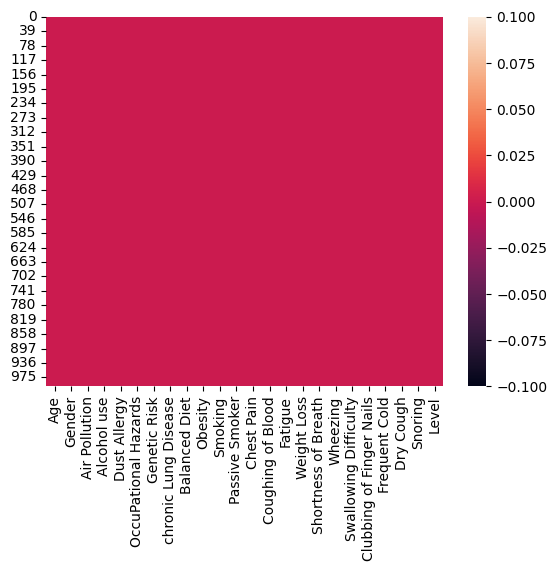

In [321]:
sns.heatmap(df.isnull())

In [322]:
df[df.duplicated()]

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
5,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
16,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
17,34,1,6,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
24,36,1,6,7,7,7,7,7,6,7,...,8,5,7,6,7,8,7,6,2,High
33,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,44,1,6,7,7,7,7,6,7,7,...,5,3,2,7,8,2,4,5,3,High
996,37,2,6,8,7,7,7,6,7,7,...,9,6,5,7,2,4,3,1,4,High
997,25,2,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
998,18,2,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [323]:
len(df.columns)

24

In [324]:
df.Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [325]:
label = {'Low':1, 'Medium':2, 'High':3}
df.Level = df.Level.apply(lambda x: label[x])

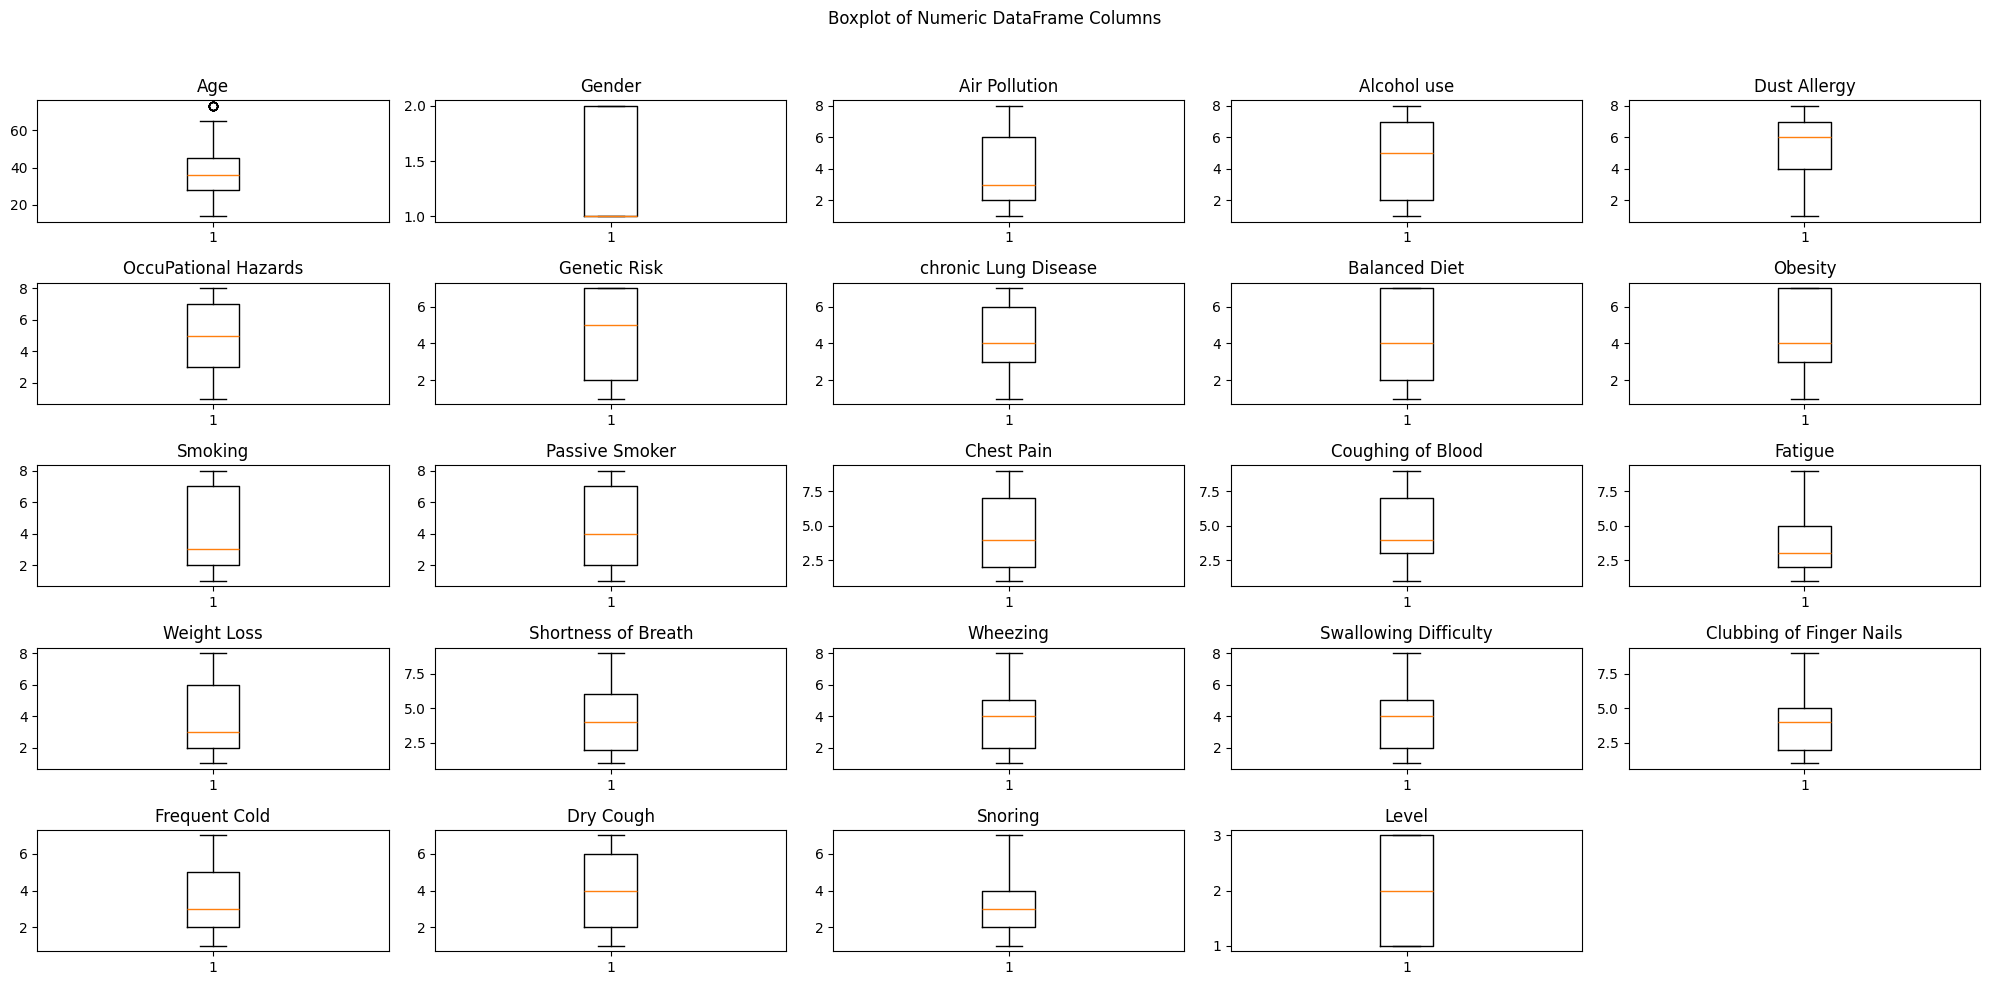

In [326]:
numeric_columns = df.select_dtypes(include='number').columns

fig, axs = plt.subplots(5, 5, figsize=(20, 10))

for i, col in enumerate(numeric_columns):
    row = i // 5  
    col_index = i % 5  
    axs[row, col_index].boxplot(df[col].dropna())  
    axs[row, col_index].set_title(col)

for j in range(i + 1, 25):
    fig.delaxes(axs[j // 5, j % 5])

plt.suptitle("Boxplot of Numeric DataFrame Columns")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


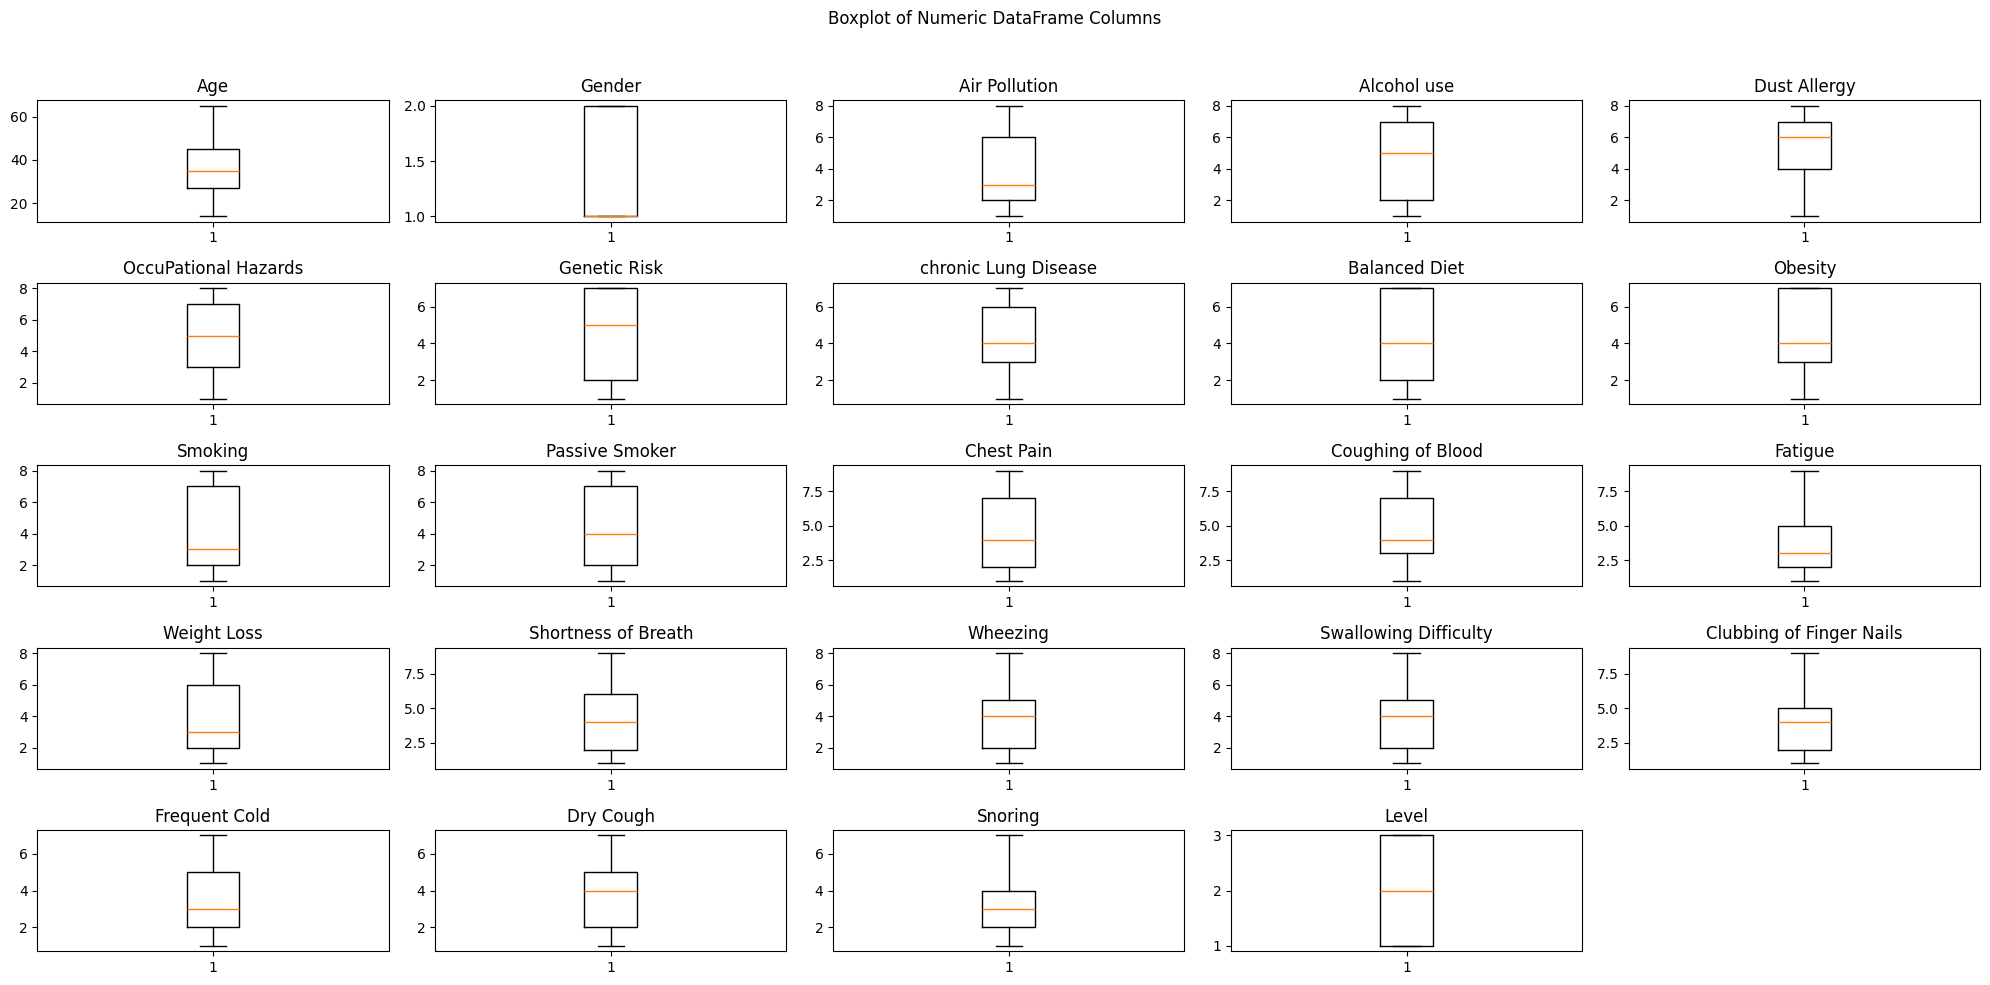

In [327]:
def remove_outliers_iqr(df):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=['int64', 'float64'])
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outlier detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = ((numeric_df < lower_bound) | (numeric_df > upper_bound)).any(axis=1)
    
    # Count the number of outliers removed
    num_outliers_removed = outliers.sum()
    
    # Filter DataFrame based on rows without outliers
    df_no_outliers = df[~outliers]
    
    return df_no_outliers

new_df = remove_outliers_iqr(df)
numeric_columns = new_df.select_dtypes(include='number').columns

fig, axs = plt.subplots(5, 5, figsize=(20, 10))

for i, col in enumerate(numeric_columns):
    row = i // 5  
    col_index = i % 5  
    axs[row, col_index].boxplot(new_df[col].dropna())  
    axs[row, col_index].set_title(col)

for j in range(i + 1, 25):
    fig.delaxes(axs[j // 5, j % 5])

plt.suptitle("Boxplot of Numeric DataFrame Columns")
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

data kategorikal = gender, 

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [329]:
scaler = MinMaxScaler()

df["Age"] = scaler.fit_transform(df[["Age"]])

df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0.322034,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,1
1,0.050847,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,2
2,0.355932,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,3
3,0.389831,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,3
4,0.542373,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,3


In [330]:
X = df.drop(columns='Level')
y = df['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

X_train


,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
680,0.220339,2,3,1,4,2,3,2,3,3,...,2,2,2,3,4,1,5,2,6,2
177,0.525424,1,3,2,4,2,3,2,3,3,...,3,4,5,6,5,5,4,6,5,4
395,0.694915,1,3,1,1,1,2,3,4,1,...,3,2,5,2,1,2,3,4,5,2
911,0.254237,2,6,7,7,7,7,6,7,7,...,7,2,7,6,7,6,7,2,3,1
793,0.050847,1,3,1,5,3,4,2,2,2,...,3,1,3,7,8,6,2,1,7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.322034,1,6,7,7,7,7,7,6,7,...,7,8,5,7,6,7,8,7,6,2
270,0.169492,2,1,2,2,3,2,4,2,3,...,1,1,1,1,2,3,4,5,2,1
860,0.372881,2,2,1,5,3,2,3,2,4,...,4,6,7,2,5,8,1,3,2,3
435,0.593220,1,6,5,6,5,5,4,6,7,...,8,8,7,9,2,1,4,6,7,2


In [331]:
knn = KNeighborsClassifier()
svm = SVC(random_state=42)
bayesian = GaussianNB()
randomforest = RandomForestClassifier(random_state=42)
desiciontree = DecisionTreeClassifier(random_state=42)

knn.fit(X_train, y_train)
svm.fit(X_train, y_train)
bayesian.fit(X_train, y_train)
randomforest.fit(X_train, y_train)
desiciontree.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [332]:
k = 10

print("\nknn model:")
print(np.mean(cross_val_score(knn, X, y, cv=k, scoring='accuracy')))
print("\nsvm model:")
print(np.mean(cross_val_score(svm, X, y, cv=k, scoring='accuracy')))
print("\nbayesian model:")
print(np.mean(cross_val_score(bayesian, X, y, cv=k, scoring='accuracy')))
print("\nrandom forest model:")
print(np.mean(cross_val_score(randomforest, X, y, cv=k, scoring='accuracy')))
print("\ndesicion tree model:")
print(np.mean(cross_val_score(desiciontree, X, y, cv=k, scoring='accuracy')))


knn model:
1.0

svm model:
1.0

bayesian model:
0.89

random forest model:
1.0

desicion tree model:
1.0


In [333]:
knn_predict = knn.predict(X_test)
svm_predict = svm.predict(X_test)
bayesian_predict = bayesian.predict(X_test)
randomforest_predict = randomforest.predict(X_test)
desiciontree_predict = desiciontree.predict(X_test)

results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

def get_metrics(y_test, y_pred, model_name):
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(y_test, y_pred)

    precision = report["macro avg"]["precision"]
    recall = report["macro avg"]["recall"]
    f1_score = report["macro avg"]["f1-score"]

    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1_score)

get_metrics(y_test, knn_predict, "KNN")
get_metrics(y_test, svm_predict, "SVM")
get_metrics(y_test, bayesian_predict, "Bayesian")
get_metrics(y_test, randomforest_predict, "Random Forest")
get_metrics(y_test, desiciontree_predict, "Decision Tree")

results_df = pd.DataFrame(results)

results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,KNN,1.000,1.000000,1.000000,1.000000
1,SVM,1.000,1.000000,1.000000,1.000000
2,Bayesian,0.896,0.905535,0.891799,0.896191
3,Random Forest,1.000,1.000000,1.000000,1.000000
4,Decision Tree,1.000,1.000000,1.000000,1.000000


In [334]:
results_df.Model.to_list()

['KNN', 'SVM', 'Bayesian', 'Random Forest', 'Decision Tree']

In [335]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=desiciontree, param_grid=param_grid, cv=k, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 1.0


In [336]:
model = DecisionTreeClassifier(criterion='gini', max_depth=None, max_features=None, min_samples_leaf=1, min_samples_split=2)


model.fit(X_train, y_train)

predict = model.predict(X_test)

print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       156
           2       1.00      1.00      1.00       156
           3       1.00      1.00      1.00       188

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



In [337]:
joblib.dump(model, 'Model/lung_cancer_level.pkl')
print("Model telah disimpan ke file 'Model/lung_cancer_level.pkl'.")

Model telah disimpan ke file 'Model/lung_cancer_level.pkl'.
